In [1]:
from numpy.linalg import inv, pinv
from pylab import *
import random
import numpy as np
import pandas as pd
import scipy.optimize as sco
import requests
import re
import bs4
import datetime as dt

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# # matplotlib 한글 깨지는 것 조정
# plt.rcParams['axes.unicode_minus'] = False
# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     path = "C:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system...')

In [2]:
# 예스트레이더 종목검색 결과를 날짜 기준으로 포맷팅
def convert_yes_price_file(gubun):
    # 우리나라 시간 = 그리니치 표준시 + 9시
    file_dt = (dt.datetime.now() + dt.timedelta(hours=9)).strftime('%Y%m%d')

    yes_price_file = pd.DataFrame()
    # 예스트레이더 출력용 지표식과 칼럼수 일치시켜야 함.
    yes_price_file = pd.read_csv(path + 'yes_stock_price_' + file_dt + '.csv',encoding= 'euc-kr',
                           names = ['날짜1','종목명','종목코드','날짜','시가','고가','저가','종가','거래량',
                                    '단기이평','중기이평','장기이평','지수단기이평','지수중기이평','지수장기이평',
                                    'MACD','MACD_OSC','ATR','CCI','StoK','StoD','TRIX','이격도'],
                           index_col= 1, header=None, dtype={'종목코드':str})

    종목명 = yes_price_file.index.unique()
    종목코드 = yes_price_file['종목코드'].unique()  # 종목코드 사용할 경우를 위해 별도 저장
    df1 = {'종목명':종목명,
           '종목코드':종목코드}
    df1 = pd.DataFrame(df1)
    df1.to_csv('symbol_cd.csv')

    cls_p_data = pd.DataFrame()
    vol_data = pd.DataFrame()
    if gubun == 1:
        hi_p_data = pd.DataFrame()
        lo_p_data = pd.DataFrame()
        sma_data = pd.DataFrame()
        mma_data = pd.DataFrame()
        lma_data = pd.DataFrame()
        sema_data = pd.DataFrame()
        mema_data = pd.DataFrame()
        lema_data = pd.DataFrame()
        macd_data = pd.DataFrame()
        macdo_data = pd.DataFrame()
        atr_data = pd.DataFrame()
        cci_data = pd.DataFrame()
        stok_data = pd.DataFrame()
        stod_data = pd.DataFrame()
        trix_data = pd.DataFrame()
        dis_data = pd.DataFrame()

    for i in range(len(종목명)):
        cls_p = yes_price_file.loc[종목명[i],['날짜','종가']]
        cls_p.set_index(['날짜'],inplace=True)
        cls_p_data = pd.concat([cls_p_data,cls_p],axis=1) 

        vol = yes_price_file.loc[종목명[i],['날짜','거래량']]
        vol.set_index(['날짜'],inplace=True)
        vol_data = pd.concat([vol_data,vol],axis=1) 

        if gubun == 1:
            hi_p = yes_price_file.loc[종목명[i],['날짜','고가']]
            hi_p.set_index(['날짜'],inplace=True)
            hi_p_data = pd.concat([hi_p_data,hi_p],axis=1) 

            lo_p = yes_price_file.loc[종목명[i],['날짜','저가']]
            lo_p.set_index(['날짜'],inplace=True)
            lo_p_data = pd.concat([lo_p_data,lo_p],axis=1) 

            sma = yes_price_file.loc[종목명[i],['날짜','단기이평']]
            sma.set_index(['날짜'],inplace=True)
            sma_data = pd.concat([sma_data,sma],axis=1) 

            mma = yes_price_file.loc[종목명[i],['날짜','중기이평']]
            mma.set_index(['날짜'],inplace=True)
            mma_data = pd.concat([mma_data,mma],axis=1) 

            lma = yes_price_file.loc[종목명[i],['날짜','장기이평']]
            lma.set_index(['날짜'],inplace=True)
            lma_data = pd.concat([lma_data,lma],axis=1) 

            atr = yes_price_file.loc[종목명[i],['날짜','ATR']]
            atr.set_index(['날짜'],inplace=True)
            atr_data = pd.concat([atr_data,atr],axis=1) 

    cls_p_data.columns = 종목명
    print('\n 종가데이터 \n', cls_p_data.head())
    cls_p_data.to_csv('cls_p_data.csv')

    vol_data.columns = 종목명
    print('\n 거래량 \n', vol_data.head())
    vol_data.to_csv('volume_data.csv')

    if gubun == 1:
        hi_p_data.columns = 종목명
        print('\n 고가데이터 \n', hi_p_data.head())
        hi_p_data.to_csv('hi_p_data.csv')

        lo_p_data.columns = 종목명
        print('\n 저가데이터 \n', lo_p_data.head())
        lo_p_data.to_csv('lo_p_data.csv')

        sma_data.columns = 종목명
        print('\n 단기이평 \n', sma_data.head())
        sma_data.to_csv('sma_data.csv')

        mma_data.columns = 종목명
        print('\n 중기이평 \n', mma_data.head())
        mma_data.to_csv('mma_data.csv')

        lma_data.columns = 종목명
        print('\n 장기이평 \n', lma_data.head())
        lma_data.to_csv('lma_data.csv')

        atr_data.columns = 종목명
        print('\n ATR \n', atr_data.head())
        atr_data.to_csv('atr_data.csv')

In [3]:
path = './'
gubun = 0 # 지표 파일을 만들려면 1로, 안 만들여면 0
          # 청산로직을 반영하려면 지표 파일도 생성해야 한다.
convert_yes_price_file(gubun)  


 종가데이터 
 종목명          나노메딕스     필룩스     부산산업   카리스국보    동성제약  에이프로젠 KIC   엔케이물산  \
날짜                                                                       
20151021.0  2585.0  2233.0  32200.0  1508.0  5260.0     3085.0  1226.0   
20151022.0  2560.0  2180.0  31650.0  1546.0  5140.0     3045.0  1193.0   
20151023.0  2650.0  2228.0  31900.0  1496.0  5100.0     3060.0  1217.0   
20151026.0  2560.0  2233.0  33600.0  1442.0  5110.0     3105.0  1197.0   
20151027.0  3100.0  2233.0  33350.0  1521.0  5160.0     3030.0  1209.0   

종목명          웰바이오텍    일신석재     남광토건    삼일제약    인스코비    인디에프       조비   대호에이엘  \
날짜                                                                             
20151021.0  2675.0  1430.0  11050.0  6790.0  1450.0  2420.0  13550.0  1202.0   
20151022.0  2485.0  1340.0  10800.0  6675.0  1395.0  2625.0  13100.0  1159.0   
20151023.0  2590.0  1365.0  11300.0  6733.0  1375.0  2600.0  13600.0  1175.0   
20151026.0  2690.0  1330.0  11150.0  6733.0  1420.0  2660.0  13350.0  1

# 블랙리터만 포트폴리오

Rf  - 무위험이자율

lmb, λ  - 위험회피계수

C, Σ  - 공분산 매트릭스

Omega, Ω  - 자산 분산 (대각 공분산 매트릭스, k * k )

Wmkt - 시가총액 비중 벡터

R  - 수익률 벡터

mean, E(r) - 포트폴리오 기대수익률

var, σ² - 포트폴리오 분산

Pi, π  - 내재균형수익률 벡터

tau, τ  - 위험조정상수

Q   - 자산의 전망수익률백터(k * 1 column vector)

λ = (E(r) - Rf)/σ²

π = λΣＷmkt

σ² = Ｗmkt'ΣＷmkt

E(r) = Ｗmkt'*R

P = 시장 전망을 지정하는 행력(k * n)

Ω = PΣP'τ  시장 전망의 오차항 공분산 행렬

π|E(R) ~ N(E(R),τΣ)  내재균형수익률

P*E(R) ~ N(Q,Ωㅎ)  View(Prior)

E(R)|π ~ N([(τΣ)**(-1) + P'Ω**(-1)P]**(-1)[(τΣ)**(-1)π+P'Ω**(-1)Q], 
블랙리터만 기대수익률
            [(τΣ)**(-1) + P'Ω**(-1)P]**(-1))

Ｗbl = (λΣ)**(-1)(E(E(R)|π) - Rf)

In [4]:
# 네이버에서 시가총액을 긁어 옴
def get_market_capital(symbol_code):
    market_capital = []
    for symbol_cd in symbol_code:
        url = 'https://finance.naver.com/item/sise.nhn?code='+str(symbol_cd)
        source = requests.get(url)
        soup = bs4.BeautifulSoup(source.text)

        tmp = soup.find(id='_sise_market_sum').text

        mkt_cap = tmp.replace(',','')
        mkt_cap = mkt_cap.replace('억원','')
        mkt_cap = mkt_cap.replace(' ','')
        mkt_cap = int(mkt_cap) * 100000000

        market_capital.append(mkt_cap)

    return market_capital

In [5]:
# 네이버에서 CD 금리 현재가를 긁어 옴  
def get_cd_rate():
    url = 'http://finance.naver.com/marketindex/interestDailyQuote.nhn?marketindexCd=IRR_CD91&page=1'
    r = requests.get(url)
    html = bs4.BeautifulSoup(r.content, 'html.parser')

    tbody = html.find('tbody')
    tr = tbody.find_all('tr')

    date = tr[0].find('td', {'class': 'date'}).text.replace('.', '').strip()
    value = tr[0].find('td', {'class': 'num'}).text.strip()
    value = float(value)/100
    return value

In [6]:
def statistics(w,r,c):
    '''포트폴리오 총계치 출력
    인수
    =====
    weight : array-like  포트폴리오 내의 비중
    
    반환값
    ======
    portfolio_return     : float 포트폴리오 수익률 기댓값
    portfolio_volatility : float 포트폴리오 변동성 기댓값
    sharpe_ratio         : float 무위험 이자율이 0일 때의 샤프 지수
    '''
    w = np.array(w)
    portfolio_return = np.sum(r * w)
    portfolio_volatility = np.sqrt(np.dot(w.T,np.dot(c, w)))
    sharp_ratio = portfolio_return / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharp_ratio])

In [7]:
# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(r,c):
    def fitness(w,r,c,t):
        stat = statistics(w,r,c)
        # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
        penalty = 100 * abs(stat[0] - t)
        return stat[1]**2 + penalty

    frontier_mean, frontier_vol = [], []
    for t in np.linspace(min(r), max(r), num=20): # Iterate through the range of returns on Y axis
       # 제약조건
        cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        # 범위값
        bnds = tuple((0, 1) for x in range(noa))
        opts = sco.minimize(fitness, noa * [1. / noa, ], (r, c, t), method='SLSQP', constraints=cons, bounds=bnds)
        if not opts.success:
            raise BaseException(opts.message)
        # add point to the min-var frontier [x,y] = [opts.x, t]
        frontier_mean.append(t)                                                 # return
        frontier_vol.append(statistics(opts['x'],t,c)[1])   # min-variance based on optimized weights

    return array(frontier_mean), array(frontier_vol)

In [8]:
def solve_weights(r,c):
    def fitness(w,r,c):
        stat = statistics(w,r,c)  
        return -(stat[0] - Rf)/stat[1]  # Sharp

    # 제약조건
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    # 범위값
    bnds = tuple((0, 1) for x in range(noa))
    opts = sco.minimize(fitness, noa * [1. / noa, ], (r, c), method='SLSQP', constraints=cons, bounds=bnds)

    if not opts.success:
        raise BaseException(opts.message)
    return opts.x   # Ratio

In [9]:
def optimize_frontier(r,c):
    W = solve_weights(r,c)
    stat = statistics(W,r,c)
    tan_mean = stat[0]  # calculate tangency portfolio
    tan_vol = stat[1]
    front_mean, front_vol = solve_frontier(r,c)  # calculate efficient frontier
    # Weights, Tangency portfolio asset means and variances, Efficient frontier means and variances
    return W, tan_mean, tan_vol, front_mean, front_vol

In [10]:
def display_assets(r,c, color='black'):
    scatter([c.iloc[i, i] ** .5 for i in range(noa)], r, marker='x', color=color), grid(True)  # draw assets
    for i in range(noa): 
        text(c.iloc[i, i] ** .5, r[i], '  %s' % 종목명[i], verticalalignment='center', color=color) # draw labels

In [11]:
def display_frontier(tan_mean, tan_vol,front_mean, front_vol, label=None, color='black'):
    text(tan_vol, tan_mean, '   tangent', verticalalignment='center', color=color)
    scatter(tan_vol, tan_mean, marker='o', color=color), grid(True)
    plot(front_vol, front_mean, label=label, color=color), grid(True)  # draw efficient frontier

In [12]:
# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(views):
    row = len(views)
    col = noa
    Q = [views[i][3] for i in range(row)]     # view matrix
    P = zeros([row, col])                                       # link matrix
    nameToIndex = dict()
    for i, n in enumerate(종목명):
        nameToIndex[n] = i
    for i, v in enumerate(views):
        name1, name2 = views[i][0], views[i][2]
        P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
        P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
    return array(Q), P

# Main

In [29]:
공분산_산출기간 = 500
out_path = './'

raw_data = pd.read_csv('cls_p_data.csv',index_col=['날짜'], parse_dates=['날짜'])
종목명 = raw_data.columns
noa = len(종목명)  # 자산수
print(종목명)
print('종목수 = ', noa)

Index(['나노메딕스', '필룩스', '부산산업', '카리스국보', '동성제약', '에이프로젠 KIC', '엔케이물산', '웰바이오텍',
       '일신석재', '남광토건', '삼일제약', '인스코비', '인디에프', '조비', '대호에이엘', '파미셀', '동양철관',
       '동양네트웍스', '일성건설'],
      dtype='object')
종목수 =  19


In [14]:
symbol_data = pd.read_csv('symbol_cd.csv',index_col=None,dtype={'종목코드':str})
종목코드 = symbol_data['종목코드']
print('\n >> 종목코드 :', 종목코드)


 >> 종목코드 : 0     074610
1     033180
2     011390
3     001140
4     002210
5     007460
6     009810
7     010600
8     007110
9     001260
10    000520
11    006490
12    014990
13    001550
14    069460
15    005690
16    008970
17    030790
18    013360
Name: 종목코드, dtype: object


In [15]:
symbol_data = pd.read_csv('symbol_cd.csv',index_col=None,dtype={'종목코드':str})
caps = get_market_capital(symbol_data['종목코드'])
print(caps)
Wmkt = caps/sum(caps)  # 시가총액 백터(n X 1)
print('시가총액 백터')
print(Wmkt)

/home/seonwhee/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/seonwhee/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[341200000000, 803400000000, 178500000000, 83600000000, 458800000000, 435300000000, 61000000000, 104300000000, 226600000000, 124300000000, 137200000000, 310100000000, 175300000000, 92200000000, 135900000000, 486900000000, 134900000000, 59600000000, 72900000000]
시가총액 백터
[ 0.07715966  0.1816825   0.04036635  0.01890547  0.10375396  0.09843962
  0.01379466  0.02358661  0.05124378  0.02810945  0.03102668  0.07012664
  0.0396427   0.02085029  0.0307327   0.11010855  0.03050656  0.01347806
  0.01648575]


In [16]:
Rf = get_cd_rate()  # 무위험이자율
print('무위험이자율 = ', Rf)

무위험이자율 =  0.015300000000000001


In [17]:
work_data = raw_data.iloc[-공분산_산출기간:]

현재가 = list(raw_data.iloc[-1])
print('\n >> 현재가 :', 현재가)
로그수익률 = np.log(work_data / work_data.shift(1))
print(로그수익률.head())


 >> 현재가 : [9900.0, 9890.0, 171500.0, 3655.0, 17900.0, 2200.0, 755.0, 2500.0, 3005.0, 12750.0, 21500.0, 3295.0, 3070.0, 18150.0, 5210.0, 8220.0, 1150.0, 594.0, 1385.0]
               나노메딕스       필룩스      부산산업     카리스국보      동성제약  에이프로젠 KIC  \
날짜                                                                        
20171103.0       NaN       NaN       NaN       NaN       NaN        NaN   
20171106.0 -0.025508 -0.001761 -0.013226 -0.002020  0.043430  -0.027337   
20171107.0  0.004549 -0.008496 -0.005935 -0.009142  0.001249  -0.009281   
20171108.0  0.006033 -0.008568  0.005935 -0.010257  0.013639   0.011588   
20171109.0  0.120286 -0.010452 -0.005935  0.000000  0.012240   0.092373   

               엔케이물산     웰바이오텍      일신석재      남광토건      삼일제약      인스코비  \
날짜                                                                       
20171103.0       NaN       NaN       NaN       NaN       NaN       NaN   
20171106.0  0.000000  0.025243 -0.007813  0.001496  0.001228 -0.012780   
20171107.0

In [18]:
R = 로그수익률.mean() * 252 # 연수익률
print(R)

나노메딕스        0.543461
필룩스          0.629756
부산산업         0.813519
카리스국보        0.659107
동성제약         0.778693
에이프로젠 KIC   -0.005706
엔케이물산        0.171127
웰바이오텍       -0.144018
일신석재         0.429016
남광토건         0.326445
삼일제약         0.543706
인스코비         0.372774
인디에프         0.459865
조비           0.219587
대호에이엘        0.839145
파미셀          0.330760
동양철관         0.027061
동양네트웍스      -0.512874
일성건설         0.116349
dtype: float64


In [19]:
C = 로그수익률.cov() * 252 # 공분산
print(C)

              나노메딕스       필룩스      부산산업     카리스국보      동성제약  에이프로젠 KIC  \
나노메딕스      1.041032  0.144542  0.026471  0.025085  0.155194   0.100015   
필룩스        0.144542  0.969997  0.038138  0.007118  0.137566   0.118202   
부산산업       0.026471  0.038138  0.919179  0.251895 -0.030373   0.011978   
카리스국보      0.025085  0.007118  0.251895  0.891146 -0.029217   0.016318   
동성제약       0.155194  0.137566 -0.030373 -0.029217  0.823501   0.167480   
에이프로젠 KIC  0.100015  0.118202  0.011978  0.016318  0.167480   0.806656   
엔케이물산      0.078689  0.010688  0.151384  0.145457 -0.006650  -0.012235   
웰바이오텍      0.074819 -0.006179 -0.046973  0.031476  0.003666   0.074715   
일신석재       0.076416  0.097333  0.464088  0.261500 -0.000092   0.048541   
남광토건       0.045951  0.083903  0.388177  0.220863  0.042496   0.036640   
삼일제약       0.173770  0.132069 -0.020898  0.025951  0.261328   0.114999   
인스코비       0.086750  0.150674  0.045100  0.020781  0.110774   0.089725   
인디에프       0.053878  0.054116  0.35223

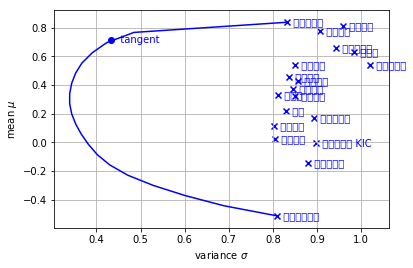

,나노메딕스,필룩스,부산산업,카리스국보,동성제약,에이프로젠 KIC,엔케이물산,웰바이오텍,일신석재,남광토건,삼일제약,인스코비,인디에프,조비,대호에이엘,파미셀,동양철관,동양네트웍스,일성건설
비중,0.060896,0.111427,0.085208,0.125935,0.205675,9.789153e-17,0.000025,1.222333e-16,1.115684e-17,3.184893e-16,0.107208,0.031231,7.710334e-17,3.416346e-16,0.272395,9.872274e-17,1.410724e-16,5.850217e-16,1.499601e-16


In [20]:
# Mean-Variance Optimization (based on historical returns)
W, tan_mean, tan_vol, front_mean, front_vol = optimize_frontier(R, C)
display_assets(R, C, color='blue')
display_frontier(tan_mean, tan_vol,front_mean, front_vol, color='blue')
xlabel('variance $\sigma$'), ylabel('mean $\mu$'), show()
display(pd.DataFrame({'비중': W}, index=종목명).T)

In [21]:
# Calculate portfolio historical return and variance
stat = statistics(Wmkt,R, C)
print(stat)

[ 0.43586268  0.41624933  1.04711923]


In [22]:
# Black-litterman reverse optimization
lmb = (stat[0] - Rf)/ stat[1]                         # Calculate return/risk trade-off
Pi = np.dot(np.dot(lmb, C), Wmkt)                        # Calculate equilibrium excess returns
Pi

array([ 0.18168931,  0.26885144,  0.14217934,  0.08407695,  0.17932531,
        0.16238799,  0.04879619,  0.03085135,  0.17060643,  0.15871119,
        0.13754506,  0.15899709,  0.15378304,  0.14261788,  0.08461169,
        0.18732807,  0.14518252,  0.08657854,  0.14312644])

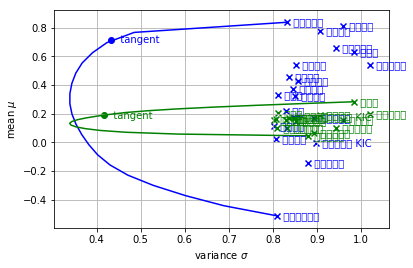

,나노메딕스,필룩스,부산산업,카리스국보,동성제약,에이프로젠 KIC,엔케이물산,웰바이오텍,일신석재,남광토건,삼일제약,인스코비,인디에프,조비,대호에이엘,파미셀,동양철관,동양네트웍스,일성건설
비중,0.07712,0.181637,0.040432,0.01898,0.103712,0.098403,0.013893,0.023689,0.05113,0.027988,0.030966,0.070145,0.039633,0.020775,0.03078,0.110113,0.0305,0.013432,0.016673


In [23]:
# Mean-Variance Optimization (based on equilibrium returns)
W2, tan_mean2, tan_vol2, front_mean2, front_vol2 = optimize_frontier(Pi + Rf, C)
display_assets(R, C, color='blue')
display_frontier(tan_mean, tan_vol, front_mean, front_vol, label='Historical returns', color='blue')
display_assets(Pi + Rf, C, color='green')
display_frontier(tan_mean2, tan_vol2, front_mean2, front_vol2, label='Implied returns', color='green')
xlabel('variance $\sigma$'), ylabel('mean $\mu$'), show()
display(pd.DataFrame({'비중': W2}, index=종목명).T)

In [24]:
# Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
        ('엔케이물산', '>', '웰바이오텍', 0.02),
        ('파미셀', '<', '대호에이엘', 0.05)
        ]

Q, P = prepare_views_and_link_matrix(views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

Views Matrix
[ 0.02  0.05]
Link Matrix
[[ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.
   0.]]


In [25]:
tau = .025 # scaling factor
# Calculate omega - uncertainty matrix about views
omega = np.dot(np.dot(np.dot(tau, P), C), P.T) # 0.025 * P * C * transpose(P)
print(omega)

[[ 0.03771444  0.0027041 ]
 [ 0.0027041   0.03441992]]


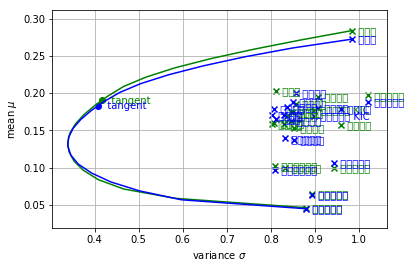

,나노메딕스,필룩스,부산산업,카리스국보,동성제약,에이프로젠 KIC,엔케이물산,웰바이오텍,일신석재,남광토건,삼일제약,인스코비,인디에프,조비,대호에이엘,파미셀,동양철관,동양네트웍스,일성건설
비중,0.076997,0.181577,0.040409,0.018957,0.103818,0.098377,0.010494,0.026879,0.051177,0.02796,0.031058,0.070272,0.039627,0.020935,0.086018,0.055039,0.030193,0.013414,0.0168


In [26]:
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(np.dot(tau, C))  # numpy.linalg.inv : 역행렬
sub_b = np.dot(np.dot(np.transpose(P), inv(omega)), P)
sub_c = np.dot(inv(np.dot(tau, C)), Pi)
sub_d = np.dot(np.dot(np.transpose(P), inv(omega)), Q)
Pi_adj = np.dot(inv(sub_a + sub_b), (sub_c + sub_d))

W3, tan_mean3, tan_vol3, front_mean3, front_vol3 = optimize_frontier(Pi_adj + Rf, C)
display_assets(Pi + Rf, C, color='green')
display_frontier(tan_mean2, tan_vol2, front_mean2, front_vol2, label='Implied returns', color='green')
display_assets(Pi_adj + Rf, C, color='blue')
display_frontier(tan_mean3, tan_vol3, front_mean3, front_vol3, label='Implied returns (adjusted views)', color='blue')
xlabel('variance $\sigma$'), ylabel('mean $\mu$'), show()
display(pd.DataFrame({'비중': W3}, index=종목명).T)

In [27]:
# 우리나라 시간 = 그리니치 표준시 + 9시
current_dt = (dt.datetime.now() + dt.timedelta(hours=9)).strftime('%Y%m%d')
date_col = [current_dt for i in range(noa)] # 날짜 칼럼 생성
print(date_col)
print(list((W3 * 100).round(3)))

['20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119']
[7.7000000000000002, 18.158000000000001, 4.0410000000000004, 1.8959999999999999, 10.382, 9.8379999999999992, 1.0489999999999999, 2.6880000000000002, 5.1180000000000003, 2.7959999999999998, 3.1059999999999999, 7.0270000000000001, 3.9630000000000001, 2.093, 8.6020000000000003, 5.5039999999999996, 3.0190000000000001, 1.341, 1.6799999999999999]


In [31]:
mp = {'날짜':date_col,
      '종목명':종목명,
      '종목코드':종목코드,
      '비중':list((W3 * 100).round(3)),
      '현재가':현재가}
df1 = pd.DataFrame(mp,columns = ['날짜','종목명','종목코드','비중','현재가'])
print(df1)
df1.to_csv(out_path + 'BL_model_portfolio.csv', index=None, encoding='utf-8')

          날짜        종목명    종목코드      비중       현재가
0   20191119      나노메딕스  074610   7.700    9900.0
1   20191119        필룩스  033180  18.158    9890.0
2   20191119       부산산업  011390   4.041  171500.0
3   20191119      카리스국보  001140   1.896    3655.0
4   20191119       동성제약  002210  10.382   17900.0
5   20191119  에이프로젠 KIC  007460   9.838    2200.0
6   20191119      엔케이물산  009810   1.049     755.0
7   20191119      웰바이오텍  010600   2.688    2500.0
8   20191119       일신석재  007110   5.118    3005.0
9   20191119       남광토건  001260   2.796   12750.0
10  20191119       삼일제약  000520   3.106   21500.0
11  20191119       인스코비  006490   7.027    3295.0
12  20191119       인디에프  014990   3.963    3070.0
13  20191119         조비  001550   2.093   18150.0
14  20191119      대호에이엘  069460   8.602    5210.0
15  20191119        파미셀  005690   5.504    8220.0
16  20191119       동양철관  008970   3.019    1150.0
17  20191119     동양네트웍스  030790   1.341     594.0
18  20191119       일성건설  013360   1.680    1385.0


In [32]:
stat = statistics(W3, Pi_adj + Rf, C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print('\n>> 수익률 = ', stat[0],', 표준편차 = ', stat[1], ', 샤프지수 = ', stat[2])


>> 수익률 =  0.183 , 표준편차 =  0.407 , 샤프지수 =  0.449
